<a href="https://colab.research.google.com/github/Yeimar1997/Metodo-n-merico/blob/master/Algoritmo_del_metodo_interpolacion_de_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodo interpolacion de newton**

Uno de estas formas de interpolación se denomina Polinomios de Interpolación deNewton, que trabaja directamente en la tabla obtenida mediante el proceso de Diferencias Divididas; En el desarrollo de estas diferencias finitas, se obtuvo en primer lugar las diferencias finitas ordinarias y luego las diferencias finitas divididas.


Matriz Vandermonde: 
[[0.    0.    0.    1.   ]
 [0.008 0.04  0.2   1.   ]
 [0.027 0.09  0.3   1.   ]
 [0.064 0.16  0.4   1.   ]]
los coeficientes del polinomio: 
[[ 41.66666667]
 [-27.5       ]
 [  6.83333333]
 [  1.        ]]
Polinomio de interpolación: 
41.6666666666667*x**3 - 27.5*x**2 + 6.83333333333334*x + 1.0

 formato pprint
                  3         2                           
41.6666666666667⋅x  - 27.5⋅x  + 6.83333333333334⋅x + 1.0


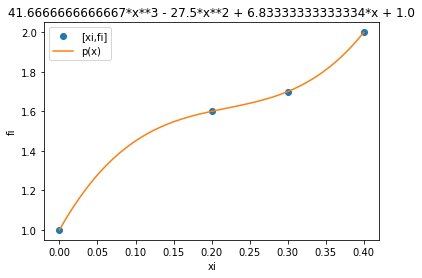

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

xi = [0,0.2,0.3,0.4]
fi = [1,1.6,1.7,2.0]

muestras = 101

# PROCEDIMIENTO 
xi = np.array(xi)
B = np.array(fi)
B = np.transpose([B])
n = len(xi)

# Matriz Vandermonde D
D = np.zeros(shape=(n,n),dtype =float)
for i in range(0,n,1):
    for j in range(0,n,1):
        potencia = (n-1)-j
        D[i,j] = xi[i]**potencia

# Resuelve sistema de ecuaciones A.X=B
coeficiente = np.linalg.solve(D,B)

# Polinomio en forma simbólica
x = sym.Symbol('x')
polinomio = 0
for i in range(0,n,1):
    potencia = (n-1)-i
    termino = coeficiente[i,0]*(x**potencia)
    polinomio = polinomio + termino

# Polinomio a forma Lambda
# para evaluación con vectores de datos xin
px = sym.lambdify(x,polinomio)

# Para graficar el polinomio en [a,b]
a = np.min(xi)
b = np.max(xi)
xin = np.linspace(a,b,muestras)
yin = px(xin)
    
# SALIDA
print('Matriz Vandermonde: ')
print(D)
print('los coeficientes del polinomio: ')
print(coeficiente)
print('Polinomio de interpolación: ')
print(polinomio)
print('\n formato pprint')
sym.pprint(polinomio)

# Grafica
plt.plot(xi,fi,'o', label='[xi,fi]')
plt.plot(xin,yin, label='p(x)')
plt.xlabel('xi')
plt.ylabel('fi')
plt.legend()
plt.title(polinomio)
plt.show()
